In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Helpers

In [3]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def sigmoid_deriv(z):
    return z * (1. - z)

def forward_prop(X, w1,b1,w2,b2):
    Z1 = np.matmul(w1,X) + b1
    A1 = sigmoid(Z1) #sigmoid on hidden layer
    Z2 = np.matmul(w2,A1) + b2
    A2 = sigmoid(Z2) #np.exp(Z2) / np.sum(np.exp(Z2), axis=0) #softmax on output
    
    return Z1, A1, Z2, A2

def backwards_prop(w1, w2, A1, A2, X, Y):
    m = X.shape[1]
    # this is the derivative of MSE
    dZ2 = A2-Y
    dw2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.matmul(w2.T,dZ2)
    dZ1 = dA1 * sigmoid_deriv(A1)
    dw1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    return dw1, dw2, db1, db2
    
def gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2, learning_rate):
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    return w2, b2, w1, b1

### Hyperparameters

In [4]:
#set 2
learning_rate = 0.1
epochs = 3000
hidden_layer_size = 64
epoch_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
hidden_layer_sizes = [1,2,4,8,16,32,64,128,256,512,1024]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 0.9, 1]

#set 1
#learning_rate = 0.01
#epochs = 1000
#hidden_layer_size = 40
#epoch_sizes = [1, 5, 10, 25,50,100,200,300,400,500,1000,2500, 5000]
#hidden_layer_sizes = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,80,100]
#learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 0.9, 1]

### Data Preprocessing

In [5]:
train1 = np.loadtxt(open("train2.csv", "rb"), delimiter=",", skiprows=1)
# result is arranged x1, x2, x3, x4, x5, y1, y2
X_train = train1[:,:5].T
print(X_train.shape)
Y_train = train1[:, 5:].T
print(Y_train.shape)

test1 = np.loadtxt(open("test2.csv", "rb"), delimiter=",", skiprows=1)
X_test = test1[:,:5].T
print(X_test.shape)
Y_test = test1[:, 5:].T
print(Y_test.shape)

(5, 399)
(2, 399)
(5, 399)
(2, 399)


# Changing HIDDEN LAYER NEURONS

In [10]:
scores = []
costs = []
for hidden_layer_num in hidden_layer_sizes:
    print('hidden layer size', hidden_layer_num)
    input_nodes = X_train.shape[0]
    hidden_nodes = hidden_layer_num
    output_nodes = Y_train.shape[0]

    np.random.seed(68)
    w1 = np.random.randn(hidden_nodes,input_nodes)
    b1 = np.zeros((hidden_nodes,1))
    w2 = np.random.randn(output_nodes,hidden_nodes)
    b2 = np.zeros((output_nodes,1)) 
    
    for epoch in range(epochs):
        # forward propagation
        Z1, A1, Z2, A2 = forward_prop(X_train,w1,b1,w2,b2)

        # mse loss
        mse_loss = np.mean((Y_train - A2) ** 2)

        # backwards propagation
        dw1, dw2, db1, db2 = backwards_prop(w1, w2, A1, A2, X_train, Y_train)

        # gradient descent
        w2, b2, w1, b1 = gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2, learning_rate)

        if (epoch % 100 == 0):
            print("Epoch", epoch, "cost: ", mse_loss)

    # calculate training accuracy
    _, _, _, A2_test = forward_prop(X_train,w1,b1,w2,b2)
    predictions_train = np.round(A2_test)
    correct_train = 0
    for j in range(predictions_train.shape[1]): # this is dumb but it works so i'm not touching it 
        if (predictions_train[0][j] == Y_train[0][j] and predictions_train[1][j] == Y_train[1][j]):
            correct_train = correct_train + 1
    print('Accuracy Train: ', correct_train * 1.0 / predictions_train.shape[1])

    # calculate test accuracy
    _, _, _, A2_test = forward_prop(X_test,w1,b1,w2,b2)
    predictions_test = np.round(A2_test)
    correct_test = 0
    for j in range(predictions_test.shape[1]):
        if (predictions_test[0][j] == Y_test[0][j] and predictions_test[1][j] == Y_test[1][j]):
            correct_test = correct_test + 1
    score = correct_test * 1.0 / predictions_test.shape[1]
    scores.append(score)
    costs.append(mse_loss)
    print('Accuracy Test ', score)

hidden layer size 1
Epoch 0 cost:  0.25208962687299713
Epoch 100 cost:  0.2503115064337728
Epoch 200 cost:  0.25013433716832956
Epoch 300 cost:  0.2500090183879201
Epoch 400 cost:  0.2499058661347206
Epoch 500 cost:  0.24980708884317104
Epoch 600 cost:  0.24969905156459402
Epoch 700 cost:  0.2495693552770041
Epoch 800 cost:  0.2494048585879203
Epoch 900 cost:  0.24919018971454895
Epoch 1000 cost:  0.24890657791781565
Epoch 1100 cost:  0.24853103459774406
Epoch 1200 cost:  0.2480360369842096
Epoch 1300 cost:  0.24738981707445867
Epoch 1400 cost:  0.2465570682291125
Epoch 1500 cost:  0.24549976228704176
Epoch 1600 cost:  0.24417916229017003
Epoch 1700 cost:  0.24256405744844292
Epoch 1800 cost:  0.24065311319334262
Epoch 1900 cost:  0.23850829293161802
Epoch 2000 cost:  0.2362641490076817
Epoch 2100 cost:  0.2340788365410956
Epoch 2200 cost:  0.2320925351229513
Epoch 2300 cost:  0.2304344286484139
Epoch 2400 cost:  0.22915830719379246
Epoch 2500 cost:  0.22819879768536197
Epoch 2600 cost

Epoch 2600 cost:  0.12525152977422083
Epoch 2700 cost:  0.12086642946808529
Epoch 2800 cost:  0.11663988859863961
Epoch 2900 cost:  0.1125774823469416
Accuracy Train:  0.8696741854636592
Accuracy Test  0.7218045112781954
hidden layer size 128
Epoch 0 cost:  0.42626546170533625
Epoch 100 cost:  0.2264470034449305
Epoch 200 cost:  0.2162221288351627
Epoch 300 cost:  0.21007539705492773
Epoch 400 cost:  0.20606854533014762
Epoch 500 cost:  0.20288950885214735
Epoch 600 cost:  0.20012253380663278
Epoch 700 cost:  0.19760585922194104
Epoch 800 cost:  0.19525620001648403
Epoch 900 cost:  0.19301935480956003
Epoch 1000 cost:  0.19085384010303197
Epoch 1100 cost:  0.18872509015130476
Epoch 1200 cost:  0.1866032947781196
Epoch 1300 cost:  0.18446243507689414
Epoch 1400 cost:  0.18227956831823033
Epoch 1500 cost:  0.18003391967701418
Epoch 1600 cost:  0.17770597099427823
Epoch 1700 cost:  0.17527800011208933
Epoch 1800 cost:  0.1727386411140459
Epoch 1900 cost:  0.17009150824823932
Epoch 2000 co

Text(0, 0.5, 'Accuracy score')

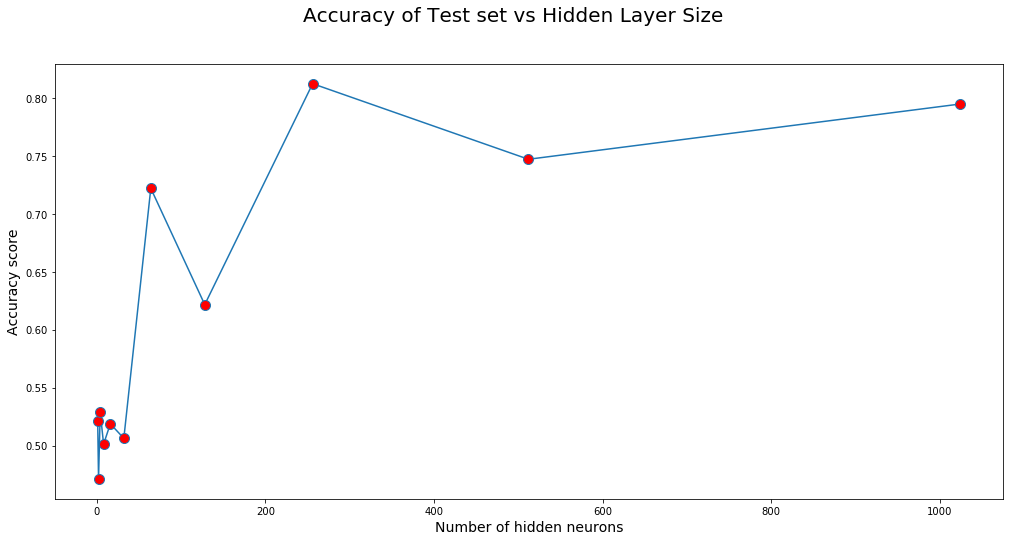

In [11]:
fig = plt.figure()
fig.suptitle('Accuracy of Test set vs Hidden Layer Size', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)
ax.plot(hidden_layer_sizes, scores, '-o', markersize = 10, markerfacecolor = 'r')
ax.set_xlabel('Number of hidden neurons', fontsize = 14)
ax.set_ylabel('Accuracy score', fontsize = 14)

# Changing EPOCHS

In [6]:
scores = []
costs = []
for num_epochs in epoch_sizes:
    print('epoch size', num_epochs)
    input_nodes = X_train.shape[0]
    hidden_nodes = hidden_layer_size
    output_nodes = Y_train.shape[0]

    np.random.seed(68)
    w1 = np.random.randn(hidden_nodes,input_nodes)
    b1 = np.zeros((hidden_nodes,1))
    w2 = np.random.randn(output_nodes,hidden_nodes)
    b2 = np.zeros((output_nodes,1)) 
    
    for epoch in range(num_epochs):
        # forward propagation
        Z1, A1, Z2, A2 = forward_prop(X_train,w1,b1,w2,b2)

        # mse loss
        mse_loss = np.mean((Y_train - A2) ** 2)

        # backwards propagation
        dw1, dw2, db1, db2 = backwards_prop(w1, w2, A1, A2, X_train, Y_train)

        # gradient descent
        w2, b2, w1, b1 = gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2, learning_rate)

        if (epoch % 100 == 0):
            print("Epoch", epoch, "cost: ", mse_loss)

    # calculate training accuracy
    _, _, _, A2_test = forward_prop(X_train,w1,b1,w2,b2)
    predictions_train = np.round(A2_test)
    correct_train = 0
    for j in range(predictions_train.shape[1]): # this is dumb but it works so i'm not touching it 
        if (predictions_train[0][j] == Y_train[0][j] and predictions_train[1][j] == Y_train[1][j]):
            correct_train = correct_train + 1
    print('Accuracy Train: ', correct_train * 1.0 / predictions_train.shape[1])

    # calculate test accuracy
    _, _, _, A2_test = forward_prop(X_test,w1,b1,w2,b2)
    predictions_test = np.round(A2_test)
    correct_test = 0
    for j in range(predictions_test.shape[1]):
        if (predictions_test[0][j] == Y_test[0][j] and predictions_test[1][j] == Y_test[1][j]):
            correct_test = correct_test + 1
    score = correct_test * 1.0 / predictions_test.shape[1]
    scores.append(score)
    costs.append(mse_loss)
    print('Accuracy Test ', score)

epoch size 1000
Epoch 0 cost:  0.41822452443031044
Epoch 100 cost:  0.22962545841180126
Epoch 200 cost:  0.22178828694485922
Epoch 300 cost:  0.21686158332664454
Epoch 400 cost:  0.21293202827680102
Epoch 500 cost:  0.2095761464438884
Epoch 600 cost:  0.20654637418251526
Epoch 700 cost:  0.20368568550910396
Epoch 800 cost:  0.2008834969679452
Epoch 900 cost:  0.1980502998228104
Accuracy Train:  0.5939849624060151
Accuracy Test  0.506265664160401
epoch size 2000
Epoch 0 cost:  0.41822452443031044
Epoch 100 cost:  0.22962545841180126
Epoch 200 cost:  0.22178828694485922
Epoch 300 cost:  0.21686158332664454
Epoch 400 cost:  0.21293202827680102
Epoch 500 cost:  0.2095761464438884
Epoch 600 cost:  0.20654637418251526
Epoch 700 cost:  0.20368568550910396
Epoch 800 cost:  0.2008834969679452
Epoch 900 cost:  0.1980502998228104
Epoch 1000 cost:  0.19511028535019753
Epoch 1100 cost:  0.19200159710144285
Epoch 1200 cost:  0.1886778372358992
Epoch 1300 cost:  0.185109172159185
Epoch 1400 cost:  0.

Epoch 5900 cost:  0.043838754858301646
Accuracy Train:  0.9598997493734336
Accuracy Test  0.8822055137844611
epoch size 7000
Epoch 0 cost:  0.41822452443031044
Epoch 100 cost:  0.22962545841180126
Epoch 200 cost:  0.22178828694485922
Epoch 300 cost:  0.21686158332664454
Epoch 400 cost:  0.21293202827680102
Epoch 500 cost:  0.2095761464438884
Epoch 600 cost:  0.20654637418251526
Epoch 700 cost:  0.20368568550910396
Epoch 800 cost:  0.2008834969679452
Epoch 900 cost:  0.1980502998228104
Epoch 1000 cost:  0.19511028535019753
Epoch 1100 cost:  0.19200159710144285
Epoch 1200 cost:  0.1886778372358992
Epoch 1300 cost:  0.185109172159185
Epoch 1400 cost:  0.18128257920113333
Epoch 1500 cost:  0.17720109729926375
Epoch 1600 cost:  0.17288218839272312
Epoch 1700 cost:  0.1683553772389317
Epoch 1800 cost:  0.16365933274625874
Epoch 1900 cost:  0.1588386093701833
Epoch 2000 cost:  0.15394034600696493
Epoch 2100 cost:  0.1490112402241394
Epoch 2200 cost:  0.14409505863265104
Epoch 2300 cost:  0.13

Epoch 6100 cost:  0.0415238669947376
Epoch 6200 cost:  0.04043384468117995
Epoch 6300 cost:  0.03938645683800844
Epoch 6400 cost:  0.038380029571305825
Epoch 6500 cost:  0.037412933374451146
Epoch 6600 cost:  0.03648357905783247
Epoch 6700 cost:  0.03559041391944913
Epoch 6800 cost:  0.03473191855590132
Epoch 6900 cost:  0.03390660464383422
Epoch 7000 cost:  0.03311301392716884
Epoch 7100 cost:  0.03234971851511689
Epoch 7200 cost:  0.03161532243940398
Epoch 7300 cost:  0.030908464262569622
Epoch 7400 cost:  0.030227820404684795
Epoch 7500 cost:  0.029572108788138565
Epoch 7600 cost:  0.02894009239842379
Epoch 7700 cost:  0.028330582415369707
Epoch 7800 cost:  0.027742440664469705
Epoch 7900 cost:  0.027174581248198132
Epoch 8000 cost:  0.026625971321667486
Epoch 8100 cost:  0.026095631061640236
Epoch 8200 cost:  0.025582632936457534
Epoch 8300 cost:  0.025086100416903713
Epoch 8400 cost:  0.024605206278438305
Epoch 8500 cost:  0.024139170639393453
Epoch 8600 cost:  0.02368725886348473

Text(0, 0.5, 'Accuracy score')

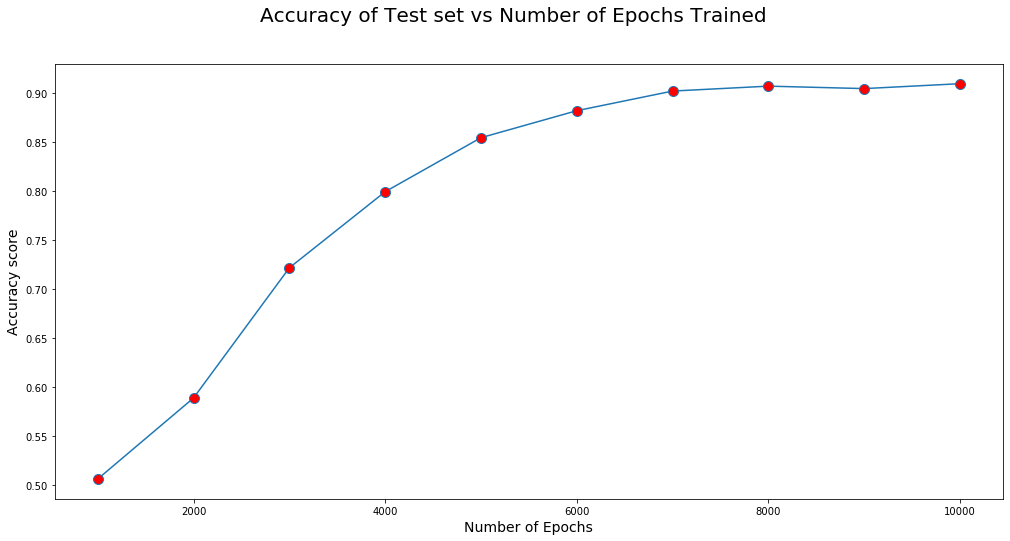

In [7]:
fig = plt.figure()
fig.suptitle('Accuracy of Test set vs Number of Epochs Trained', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)
ax.plot(epoch_sizes, scores, '-o', markersize = 10, markerfacecolor = 'r')
ax.set_xlabel('Number of Epochs', fontsize = 14)
ax.set_ylabel('Accuracy score', fontsize = 14)

# Changing LEARNING RATES

In [8]:
scores = []
costs = []
for learning_rate_it in learning_rates:
    print('learning rate',learning_rate_it)
    input_nodes = X_train.shape[0]
    hidden_nodes = hidden_layer_size
    output_nodes = Y_train.shape[0]

    np.random.seed(68)
    w1 = np.random.randn(hidden_nodes,input_nodes)
    b1 = np.zeros((hidden_nodes,1))
    w2 = np.random.randn(output_nodes,hidden_nodes)
    b2 = np.zeros((output_nodes,1)) 
    
    for epoch in range(epochs):
        # forward propagation
        Z1, A1, Z2, A2 = forward_prop(X_train,w1,b1,w2,b2)

        # mse loss
        mse_loss = np.mean((Y_train - A2) ** 2)

        # backwards propagation
        dw1, dw2, db1, db2 = backwards_prop(w1, w2, A1, A2, X_train, Y_train)

        # gradient descent
        w2, b2, w1, b1 = gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2, learning_rate_it)

        if (epoch % 100 == 0):
            print("Epoch", epoch, "cost: ", mse_loss)

    # calculate training accuracy
    _, _, _, A2_test = forward_prop(X_train,w1,b1,w2,b2)
    predictions_train = np.round(A2_test)
    correct_train = 0
    for j in range(predictions_train.shape[1]): # this is dumb but it works so i'm not touching it 
        if (predictions_train[0][j] == Y_train[0][j] and predictions_train[1][j] == Y_train[1][j]):
            correct_train = correct_train + 1
    print('Accuracy Train: ', correct_train * 1.0 / predictions_train.shape[1])

    # calculate test accuracy
    _, _, _, A2_test = forward_prop(X_test,w1,b1,w2,b2)
    predictions_test = np.round(A2_test)
    correct_test = 0
    for j in range(predictions_test.shape[1]):
        if (predictions_test[0][j] == Y_test[0][j] and predictions_test[1][j] == Y_test[1][j]):
            correct_test = correct_test + 1
    score = correct_test * 1.0 / predictions_test.shape[1]
    scores.append(score)
    costs.append(mse_loss)
    print('Accuracy Test ', score)

learning rate 0.0001
Epoch 0 cost:  0.41822452443031044
Epoch 100 cost:  0.4158745342121775
Epoch 200 cost:  0.4135717002620395
Epoch 300 cost:  0.41132086234769105
Epoch 400 cost:  0.4091261556620527
Epoch 500 cost:  0.4069910043186373
Epoch 600 cost:  0.40491813077478317
Epoch 700 cost:  0.40290957912923175
Epoch 800 cost:  0.40096674993583437
Epoch 900 cost:  0.39909044404421584
Epoch 1000 cost:  0.39728091300019713
Epoch 1100 cost:  0.395537913683432
Epoch 1200 cost:  0.39386076509290835
Epoch 1300 cost:  0.3922484054790631
Epoch 1400 cost:  0.39069944833445164
Epoch 1500 cost:  0.3892122360689812
Epoch 1600 cost:  0.38778489049274395
Epoch 1700 cost:  0.3864153594975743
Epoch 1800 cost:  0.38510145956097186
Epoch 1900 cost:  0.3838409138904755
Epoch 2000 cost:  0.3826313861835233
Epoch 2100 cost:  0.38147051009988137
Epoch 2200 cost:  0.38035591463464824
Epoch 2300 cost:  0.3792852456439699
Epoch 2400 cost:  0.3782561838173241
Epoch 2500 cost:  0.3772664594137552
Epoch 2600 cost: 

Epoch 2500 cost:  0.005638742261082945
Epoch 2600 cost:  0.005169241301466248
Epoch 2700 cost:  0.004756426611719834
Epoch 2800 cost:  0.004390734210362249
Epoch 2900 cost:  0.004064628373264081
Accuracy Train:  1.0
Accuracy Test  0.9523809523809523
learning rate 1
Epoch 0 cost:  0.41822452443031044
Epoch 100 cost:  0.22391971003137928
Epoch 200 cost:  0.2069951464488586
Epoch 300 cost:  0.19749026514340837
Epoch 400 cost:  0.1889540461989121
Epoch 500 cost:  0.17973101782770687
Epoch 600 cost:  0.16565442054312382
Epoch 700 cost:  0.14581397092240464
Epoch 800 cost:  0.11797927940480944
Epoch 900 cost:  0.08088495704785276
Epoch 1000 cost:  0.047652105979244984
Epoch 1100 cost:  0.031965559957717896
Epoch 1200 cost:  0.023459872577973728
Epoch 1300 cost:  0.018137681525802123
Epoch 1400 cost:  0.014571469749872263
Epoch 1500 cost:  0.0120237394365078
Epoch 1600 cost:  0.010111505113185778
Epoch 1700 cost:  0.008626149830118224
Epoch 1800 cost:  0.007443522782119196
Epoch 1900 cost:  0

Text(0, 0.5, 'Accuracy score')

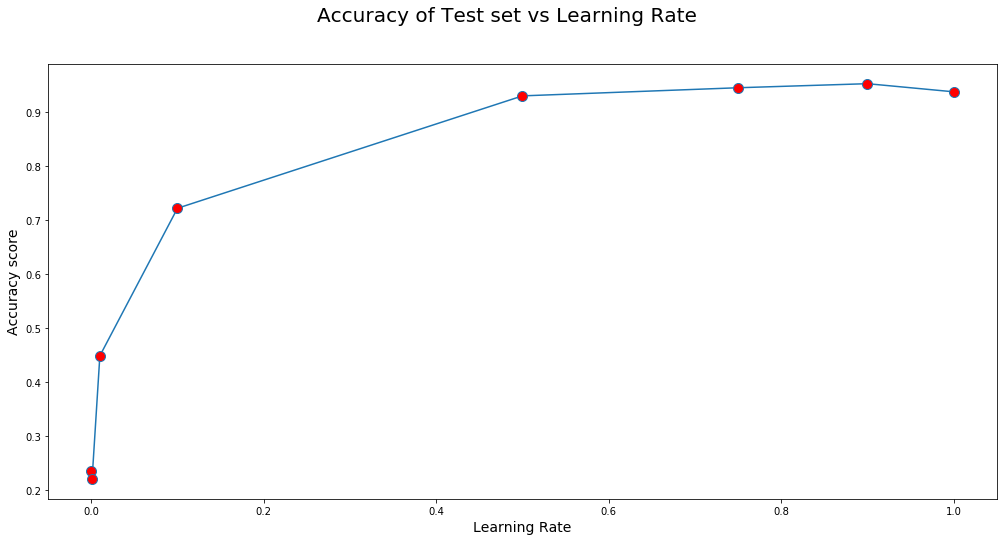

In [9]:
fig = plt.figure()
fig.suptitle('Accuracy of Test set vs Learning Rate', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)
ax.plot(learning_rates, scores, '-o', markersize = 10, markerfacecolor = 'r')
ax.set_xlabel('Learning Rate', fontsize = 14)
ax.set_ylabel('Accuracy score', fontsize = 14)